# Introduction to Statistics with Python -- Part 3

## Matplotlib

One of the key aspects of analyzing data is to visualize its properties. Traditionally, Matplotlib has established itself as a kind of standard library for visualization in Python. There are also more advanced libraries like [Seaborn](https://seaborn.pydata.org/index.html), which is based on Matplotlib but contains a few more high-level functionalities. However, this introduction is only aimed to cover the most basic functionalities needed for data analysis. More extensive information can be found as always on the online [Matplotlib documentation](https://matplotlib.org/stable/). 

First, we start by importing Matplotlib and explicitly the pyplot interface:

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.__version__

'3.8.0'

Pyplot offers several plotting styles to chose from. For now, let's chose the "default" style:

In [7]:
plt.style.use('default')

More styles can be found in the [Matplotlib style sheet](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html).

When trying to display a plot, there are some subtelties depending on whether you are writing a python script, working in the IPython shell or on a Jupyter notebook, like here. For a script you would just add "plt.show()" after you've defined your plot, run the script and the plot will be openend in a window. If you want to display a plot in the IPython shell you need to specify "%matplotlib" before you import Matplotlib and pyplot as above. This will create another window, which will be gradually updated as you develop the plot.

For plotting inside a Jupyter notebook there are two distinct cases: You can use "%matplotlib widget" to embed an interactive plot within your notebook, or you can specify "%matplotlib inline" to create a static plot in your notebook. We will use the latter for this introduction.

### Continous functions and scatter plots in 1D and 2D

Now, let's try creating a very basic plot:

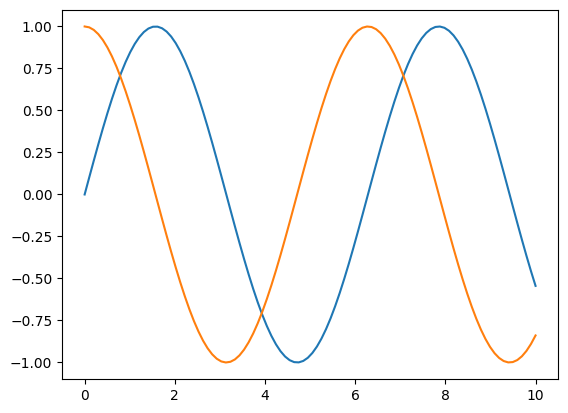

In [29]:
%matplotlib inline

import numpy as np

x = np.linspace(0, 10, 100)  # create a numpy array with 100 evenly distributed entries from 0 to 10

fig = plt.figure()
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

Figures can be saved into a separate file with the "savefig" method. Supported data formats include among others .png, .pdf, .jpg, .eps.

In [21]:
fig.savefig('first_plot.png')

One figure can also include multiple plots, which is convenient e.g. for plotting ratios of distributions in an extra panel below:

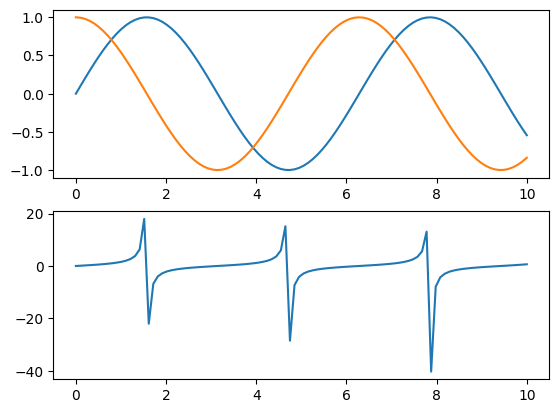

In [30]:
fig, ax = plt.subplots(2) # ax will be an array of two objects of the type Axes

ax[0].plot(x, np.sin(x))
ax[0].plot(x, np.cos(x))

ax[1].plot(x, np.sin(x)/np.cos(x))

Now we have a nice plot of two distributions with a ratio panel. However, no plot is of much good without things like axis labels, line styles, line colors or legends:

[Text(0, 0.5, 'f(x)'), Text(0.5, 1.0, 'Trigonometric functions')]

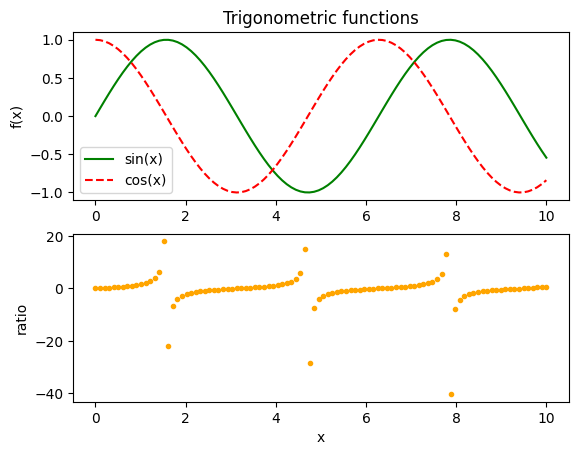

In [43]:
fig, ax = plt.subplots(2) # ax will be an array of two objects of the type Axes

ax[0].plot(x, np.sin(x), '-', color='green', label="sin(x)") # solid line
ax[0].plot(x, np.cos(x), '--', color='red', label="cos(x)")  # dashed line

ax[1].plot(x, np.sin(x)/np.cos(x), '.', color='orange') # dotted line

ax[0].legend() # this will display the labels of the curves in a legend (for a single plot works as plt.legend())
ax[1].set(xlabel='x', ylabel='ratio') # setting labels of x and y axis for an Axis object --> plt.xlabel() or plt.ylabel() for single plt object
ax[0].set(ylabel='f(x)', title='Trigonometric functions')

Data is usually provided in the form of discrete data points. Therefore, discrete plotting methods like scatter plots or histograms (see following section) will be needed. Remember that the NumPy array 'x' that we created above is in reality a discrete dataset. We can plot it as such by using either line style '.' or 'o', like we have done for the ratio plot before. Scatter plots in 2D can be drawn like this:

Text(0, 0.5, 'random variable y')

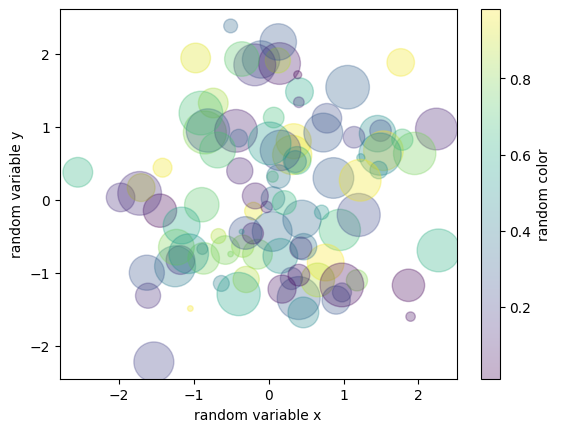

In [57]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)  # random color coding
sizes = 1000*rng.rand(100) # random blob size

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3, cmap='viridis') # alpha=opacity, cmap=used color style
plt.colorbar(label='random color') # plot color axis

plt.xlabel('random variable x')
plt.ylabel('random variable y')


In 2D one can also project 3D relations in the form of contours:

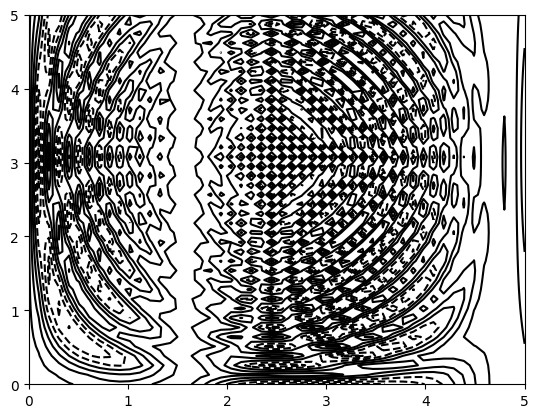

In [62]:
def f(x,y):
    return np.sin(x)**10 + np.cos(10*y*x) * np.cos(x) # some function of x and y

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)
X, Y = np.meshgrid(x, y) # creates a grid of x and y values
Z = f(X,Y)

plt.contour(X, Y, Z, colors='black')

Here we have used only a single color for the cmap argument. This results into solid lines for the positive contours and dashed lines for negative contours. To make it more readable, we can use more contour lines and try another cmap argument:

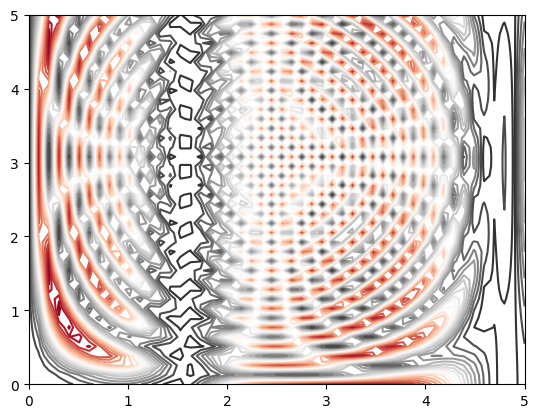

In [63]:
plt.contour(X, Y, Z, 20, cmap='RdGy')

To make the plot even nicer, we can switch to a filled contour plot by using "contourf" and add a colorbar to clarify the meaning of the colors (maxima and minima):

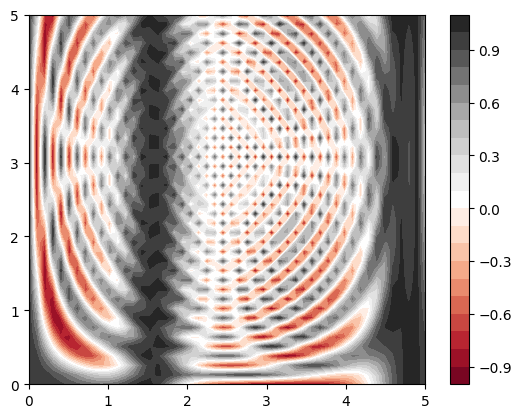

In [66]:
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

### Histograms

Data is mostly visualized by "sorting" it in different bins defined as a range in a characterizing variable. Let's create ourselves a random dataset and make a very simple histogram from it:

(array([  6.,  21.,  89., 185., 279., 226., 126.,  57.,   8.,   3.]),
 array([-3.33793418, -2.64652019, -1.9551062 , -1.26369221, -0.57227823,
         0.11913576,  0.81054975,  1.50196374,  2.19337772,  2.88479171,
         3.5762057 ]),
 <BarContainer object of 10 artists>)

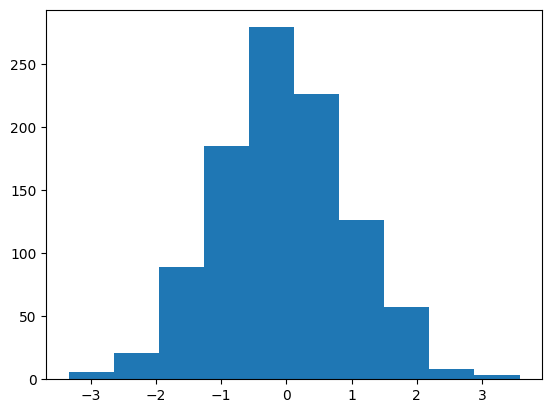

In [67]:
randomdata = np.random.randn(1000)
plt.hist(randomdata)

This is already quite powerful. By using more of the [hist() arguments](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html), we can further customize the output:

(array([ 1.,  2.,  0.,  1.,  2.,  3.,  5.,  5.,  3.,  5.,  4., 12., 17.,
        35., 21., 37., 27., 38., 42., 41., 41., 61., 48., 67., 62., 49.,
        41., 47., 43., 46., 31., 26., 20., 23., 26., 14., 13., 15.,  9.,
         6.,  2.,  4.,  1.,  0.,  1.,  2.,  0.,  0.,  0.,  1.]),
 array([-3.33793418, -3.19965138, -3.06136858, -2.92308578, -2.78480299,
        -2.64652019, -2.50823739, -2.36995459, -2.2316718 , -2.093389  ,
        -1.9551062 , -1.8168234 , -1.67854061, -1.54025781, -1.40197501,
        -1.26369221, -1.12540942, -0.98712662, -0.84884382, -0.71056102,
        -0.57227823, -0.43399543, -0.29571263, -0.15742983, -0.01914704,
         0.11913576,  0.25741856,  0.39570136,  0.53398415,  0.67226695,
         0.81054975,  0.94883255,  1.08711534,  1.22539814,  1.36368094,
         1.50196374,  1.64024653,  1.77852933,  1.91681213,  2.05509493,
         2.19337772,  2.33166052,  2.46994332,  2.60822612,  2.74650891,
         2.88479171,  3.02307451,  3.16135731,  3.2996401 ,

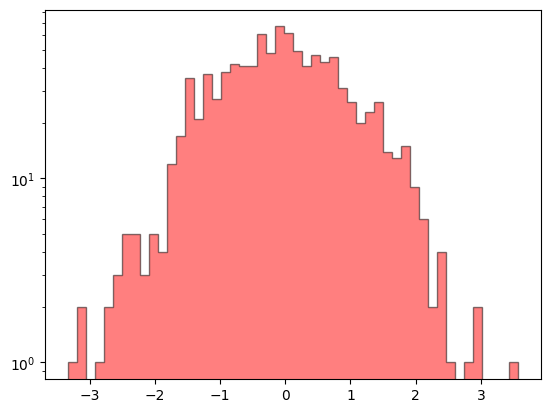

In [121]:
plt.hist(randomdata, 
         bins=50,                 # number of bins 
         alpha=0.5,               # opacity
         histtype='stepfilled',   # individual bars ('bar') or steps ('step') both either just as such or filled
         color='red',             # fill color
         edgecolor='black',       # enveloping line color
         log=True)                # log scale

As for functions, we can plot multiple histograms together:

Text(0, 0.5, 'y-axis')

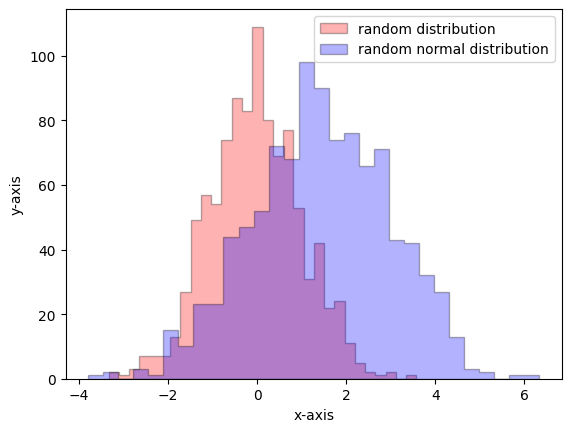

In [123]:
randomdata2 = np.random.normal(1.5, 1.5, 1000)

plt.hist(randomdata, bins=30, alpha=0.3, histtype='stepfilled', color='red', edgecolor='black', label='random distribution')
plt.hist(randomdata2, bins=30, alpha=0.3, histtype='stepfilled', color='blue', edgecolor='black', label='random normal distribution')
plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

### Uncertainties and Error Bars

Displaying uncertainties is a crucial part of visualizing data. Matplotlib also provides this functionality, as discrete error bars as well as continuous error bands.

<ErrorbarContainer object of 3 artists>

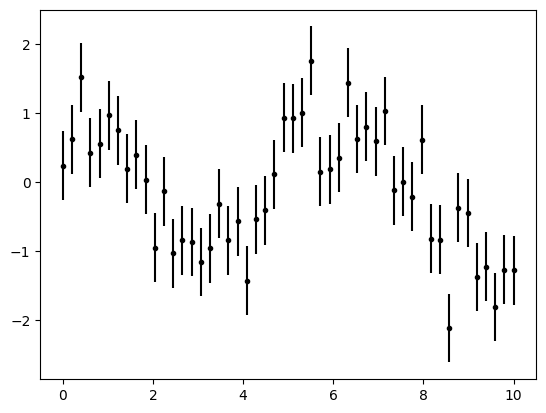

In [97]:
x = np.linspace(0, 10, 50)
dy = 0.5 # size of the arrow bar
y = np.cos(x) + dy*np.random.randn(50) # generating an array of randomly "wiggled" data points from a parent cosine function

plt.errorbar(x,y, yerr=dy, color='black', fmt='.')

The "fmt" or format argument encodes the appearance of the data points and error bars, in analogy to the line styles we've encountered before. For histograms, we can add error bars by first creating an array of all the bins.

Text(0, 0.5, 'y-axis')

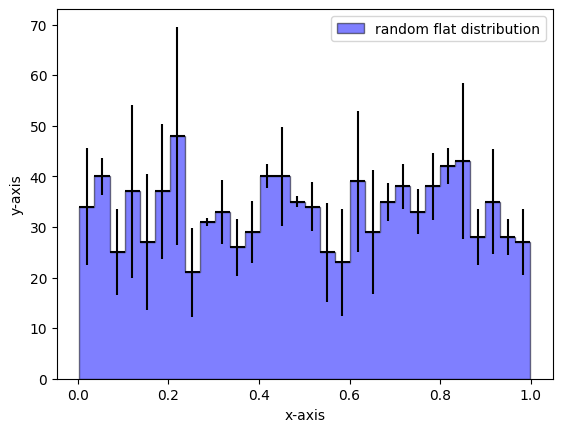

In [122]:
randomdata3 = np.random.random(1000)

# the return values of the hist function are n (value of the histogram bins), bins (edges of the bins) and patches (information how the histogram was put together)
n, bins, patches = plt.hist(randomdata3, bins=30, alpha=0.5, histtype='stepfilled', color='blue', edgecolor='black', label='random flat distribution')

# get bin centers
centers = bins[:-1] + (np.diff(bins)/2)  # dividing bin width by 2 and adding it to each lower bin edge

# "generate" uncertainty array
rand = np.random.rand(30)
uncert = n*rand*0.5

# draw the errorbars
plt.errorbar(centers, n, xerr=np.diff(bins)/2, yerr=uncert, color='black', fmt='None')

plt.legend()
plt.xlabel('x-axis')
plt.ylabel('y-axis')

Similarly to scatter plots, it is also possible to plot 2D histograms:

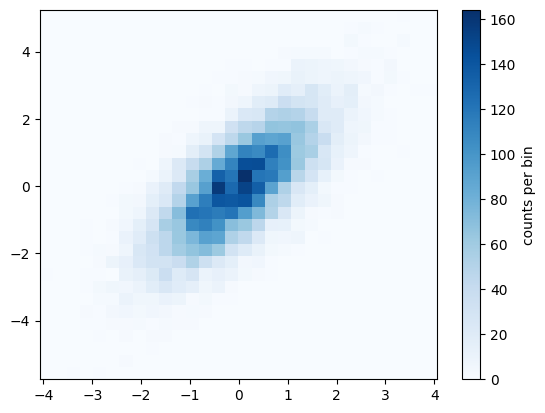

In [125]:
# create data from a 2D Gaussian
mean = [0, 0]
cov = [[1,1], [1,2]]
x,y = np.random.multivariate_normal(mean, cov, 10000).T

plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts per bin')

## Plotting from Pandas DataFrames

So far, you've seen several examples for using matplotlib for the visualization of data stored in NumPy arrays. Data from Pandas dataFrames can also be handled with Matplotlib. In the following you see an example of a dataset on wine properties, containing samples of three quality classes of wine and the corresponding chemical information.

   class  alcohol  malic acid   ash  alcalinity of ash  magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   total phenols  flavanoids  non-flavanoid phenols  proanthocyanins  \
0           2.80        3.06                   0.28             2.29   
1           2.65        2.76                   0.26             1.28   
2           2.80        3.24                   0.30             2.81   
3           3.85        3.49                   0.24             2.18   
4           2.80        2.69                   0.39             1.82   

   color intensity   hue  OD280/OD315 of diluted wines  proline  
0             5.64  1.04                          3.92     1065  
1             4.38  

Text(0, 0.5, '# wine samples')

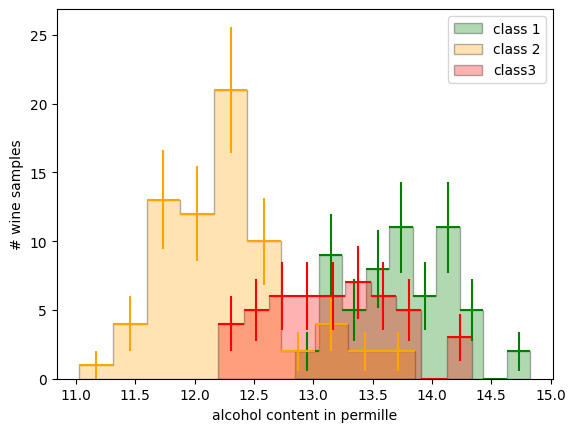

In [150]:
import pandas as pd

# load some data
winesample = pd.read_csv('data/wine.csv')

# show first few lines of dataframe
print(winesample.head())

# plot wines by alcoholic content
n1, bins1, patches1 = plt.hist(winesample[(winesample['class']==1)].alcohol, bins=10, color='green', alpha=0.3, edgecolor='black', histtype='stepfilled', label='class 1')
n2, bins2, patches2 = plt.hist(winesample[(winesample['class']==2)].alcohol, bins=10, color='orange', alpha=0.3, edgecolor='black', histtype='stepfilled', label='class 2')
n3, bins3, patches3 = plt.hist(winesample[(winesample['class']==3)].alcohol, bins=10, color='red', alpha=0.3, edgecolor='black', histtype='stepfilled', label='class3')

# get bin centers
centers1 = bins1[:-1] + (np.diff(bins1)/2)
centers2 = bins2[:-1] + (np.diff(bins2)/2)
centers3 = bins3[:-1] + (np.diff(bins3)/2)

# plot error bars
unc1 = np.sqrt(n1)
unc2 = np.sqrt(n2)
unc3 = np.sqrt(n3)

plt.errorbar(centers1, n1, xerr=np.diff(bins1)/2, yerr=unc1, color='green', fmt='None')
plt.errorbar(centers2, n2, xerr=np.diff(bins2)/2, yerr=unc2, color='orange', fmt='None')
plt.errorbar(centers3, n3, xerr=np.diff(bins3)/2, yerr=unc3, color='red', fmt='None')

# add labels and legend
plt.legend()
plt.xlabel('alcohol content in permille')
plt.ylabel('# wine samples')

As mentioned before, this is by far not everything that can be said about plotting with Python and certainly not the end of the story concerning statistical data analysis with Python. Maybe we'll have some further introductions on topics like fitting or machine learning using Python libraries. However, these three notebooks should have covered the basic tools needed during this course. If you have any questions or suggestions for additions, please don't hesitate to get in touch via the moodle course!